https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [8]:
# import all the libraries which are required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
#os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\House Pricing Dataset\\housing-prices-dataset') # Place the correct working folder
os.chdir('C:\\Users\\Administrator\\Desktop\\Data')

In [3]:
## Read the data
hp=pd.read_csv('HousePricingDataset.csv') ## Put the right dataset name

In [4]:
hp.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [5]:
# Run this set of code
hp.loc[hp['LotFrontage'].isnull(),'LotFrontage']=np.mean(hp['LotFrontage'])
hp.loc[hp['Alley'].isnull(),'Alley']='No Alley'
hp.loc[hp['BsmtQual'].isnull(),'BsmtQual']='No Bsmt'
hp.loc[hp['BsmtCond'].isnull(),'BsmtCond']='No Bsmt'
hp.loc[hp['BsmtExposure'].isnull(),'BsmtExposure']='No Bsmt'
hp.loc[hp['BsmtFinType1'].isnull(),'BsmtFinType1']='No Bsmt'
hp.loc[hp['BsmtFinType2'].isnull(),'BsmtFinType2']='No Bsmt'
hp.loc[hp['GarageType'].isnull(),'GarageType']='No Garage'
hp.loc[hp['GarageYrBlt'].isnull(),'GarageYrBlt']= 9999
hp.loc[hp['GarageFinish'].isnull(),'GarageFinish']='No Garage'
hp.loc[hp['GarageQual'].isnull(),'GarageQual']='No Garage'
hp.loc[hp['GarageCond'].isnull(),'GarageCond']='No Garage'
hp.loc[hp['PoolQC'].isnull(),'PoolQC']='No Pool'
hp.loc[hp['Fence'].isnull(),'Fence']='No Fence'
hp.loc[hp['FireplaceQu'].isnull(),'FireplaceQu']='No Fireplace'

In [6]:
hp.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
hp['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [9]:
np.percentile(hp['LotArea'],[75]) # 0 to 100

array([11601.5])

In [10]:
np.quantile(hp['LotArea'],[0.25]) # 0 to 1

array([7553.5])

In [11]:
np.quantile(hp['LotArea'],[0.50])

array([9478.5])

In [12]:
print(np.quantile(hp['LotArea'],[0.]))
print(np.quantile(hp['LotArea'],[1]))

[1300.]
[215245.]


In [10]:
scores=[72,54, 56, 61, 62, 66, 68, 43, 69, 69, 70, 71,77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]

In [38]:
numbers = [1, 3, 4, 2]
scores=scores.sort(reverse = True)

In [18]:
import numpy as np
np.percentile(scores,[60])

array([81.4])

In [19]:
grades=[34, 42, 51, 65, 69, 74, 78, 84, 85, 85, 86, 87]
np.percentile(grades,[80])

array([85.])

In [77]:
## Correlation and Covariance
temperature=[98,87,90,85,95,75]
numberofcustomers=[15,12,10,10,16,7]
import pandas as pd
icecream = pd.DataFrame(list(zip(temperature, numberofcustomers)), columns =['temperature', 'numberofcustomers'])
print(icecream)


## Correlation
print('Covariance is ',icecream['temperature'].cov(icecream['numberofcustomers']))
print('Correlation is ',icecream['temperature'].corr(icecream['numberofcustomers']))

   temperature  numberofcustomers
0           98                 15
1           87                 12
2           90                 10
3           85                 10
4           95                 16
5           75                  7
Covariance is  25.133333333333333
Correlation is  0.9117671365080745


In [78]:
np.mean(icecream['numberofcustomers'])

11.666666666666666

In [79]:
## Variance and Standard Deviation
np.var(temperature)

55.22222222222223

In [80]:
#Zscore

In [81]:
#Number of Customers Column
from sklearn.preprocessing import StandardScaler #Zscore

zscore_numberofcustomers=StandardScaler()

zscore_numberofcustomers.fit(np.array(icecream['numberofcustomers']).reshape(-1, 1))

zscore_numberofcustomers_VALUES=zscore_numberofcustomers.transform(np.array(icecream['numberofcustomers']).reshape(-1, 1))

icecream['zscore_numberofcustomers']=zscore_numberofcustomers_VALUES

C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [82]:
icecream

temperature  numberofcustomers  zscore_numberofcustomers
0           98                 15                  1.078328
1           87                 12                  0.107833
2           90                 10                 -0.539164
3           85                 10                 -0.539164
4           95                 16                  1.401826
5           75                  7                 -1.509659

In [83]:

zscore_temperature=StandardScaler()

zscore_temperature.fit(np.array(icecream['temperature']).reshape(-1, 1))

zscore_temperature_VALUES=zscore_temperature.transform(np.array(icecream['temperature']).reshape(-1, 1))

icecream['zscore_temperature']=zscore_temperature_VALUES


C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [84]:
icecream

temperature  numberofcustomers  zscore_numberofcustomers  \
0           98                 15                  1.078328   
1           87                 12                  0.107833   
2           90                 10                 -0.539164   
3           85                 10                 -0.539164   
4           95                 16                  1.401826   
5           75                  7                 -1.509659   

   zscore_temperature  
0            1.300828  
1           -0.179425  
2            0.224281  
3           -0.448561  
4            0.897123  
5           -1.794245

In [85]:
## Min Max
from sklearn.preprocessing import MinMaxScaler
minmax_temperature=MinMaxScaler()
minmax_temperature.fit(np.array(icecream['temperature']).reshape(-1, 1))
minmax_temperature_values=minmax_temperature.transform(np.array(icecream['temperature']).reshape(-1, 1))

icecream['minmax_temperature']=minmax_temperature_values

C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [86]:
icecream

temperature  numberofcustomers  zscore_numberofcustomers  \
0           98                 15                  1.078328   
1           87                 12                  0.107833   
2           90                 10                 -0.539164   
3           85                 10                 -0.539164   
4           95                 16                  1.401826   
5           75                  7                 -1.509659   

   zscore_temperature  minmax_temperature  
0            1.300828            1.000000  
1           -0.179425            0.521739  
2            0.224281            0.652174  
3           -0.448561            0.434783  
4            0.897123            0.869565  
5           -1.794245            0.000000

## Exploratory data analysis (EDA)

#### Single Categorical Variables

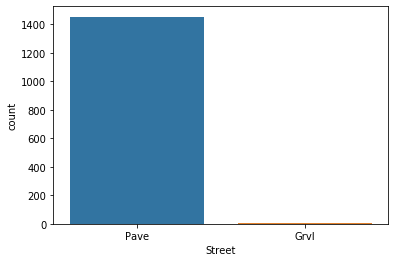

In [9]:
sns.countplot(hp['Street'])

#### Two Categorical Variables

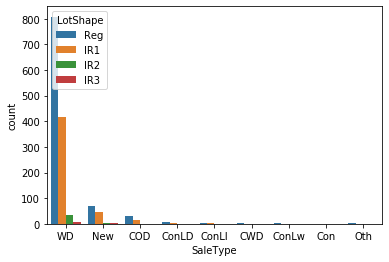

In [10]:
sns.countplot(x='SaleType',hue='LotShape',data=hp)

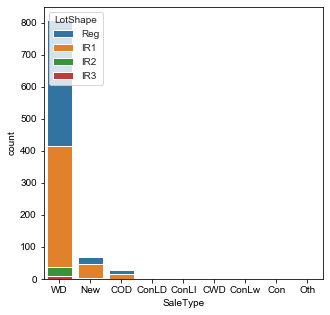

In [11]:
f,ax=plt.subplots(figsize=(5,5))
#sns.set()
sns.set_style("whitegrid")
sns.countplot(x='SaleType',hue='LotShape',data=hp,dodge=False)
#sns.axes_style("whitegrid")
#sns.set_context("talk")

#### One Continuous variable

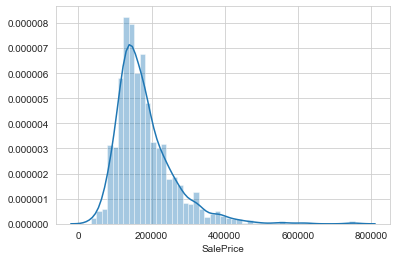

In [13]:
sns.distplot(hp['SalePrice'])

#### Categorical(1) vs Continuous(1) variable

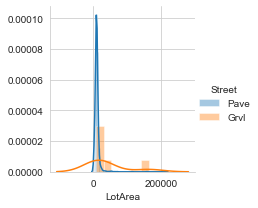

In [17]:
#f,ax=plt.subplots(figsize=(5,5))
sns.set_style("whitegrid")
sns.FacetGrid(hp,hue='Street')\
    .map(sns.distplot,"LotArea")\
    .add_legend()
plt.show()